# 데이터 집계와 시각화

### 주요 내용

1. 건수, 합계 평균 등 집계값 계산
2. 히스토그램, 상자그림, 막대그래프 등 그래프 작성 
3. 정렬 및 피벗테이블 활용

<br>

### 목표 
1. 집계값을 계산할 수 있다.
2. 적절한 그래프를 작성하고 올바르게 해석할 수 있다.
3. 피벗 테이블 등 다양한 방법으로 집계하고, 결과값을 적절히 정렬할 수 있다. 


<br>
<hr>
<br>

## 예제 및 실습 데이터 불러오기

In [1]:
# 데이터 불러오기
import pandas as pd
df_ins = pd.read_csv('./data/insurance.csv')
df_ins

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [2]:
df_sp = pd.read_csv('./data/StudentsPerformance.csv')
df_sp

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
# 전체 데이터프레임의 기본 통계 확인
# df_sp.describe()
# df_sp.describe(include='number')
df_sp.describe(include='object')

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


<br>

## 1. 수치형 변수의 집계값과 히스토그램

하나의 수치형 변수로 합계, 평균과 같은 집계값을 계산할 수 있고 히스토그램으로 분포를 확인


<br>

### 1.1. 수치형 변수의 집계값 계산

수치형 변수를 선택한 다음 sum( ), mean( ) 같은 메서드를 활용해서 단순한 집계값을 계산  
먼저 변수를 선택하고 다양한 집계 함수를 메서드로 활용

In [4]:
# 관심 변수 선택
df_ins['charges']

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [5]:
# 수치형 변수의 집계값 계산
    # mean( ) : 수치형 Series의 메서드
df_ins['charges'].mean()

13270.422265141257

In [6]:
df_ins['charges'].sum()

17755824.990759

In [7]:
# 분산과 표준편차계산
df_ins['charges'].var(), df_ins['charges'].std()

(146652372.1528548, 12110.011236693994)

In [8]:
df_ins['charges'].median()

9382.033

In [9]:
# 관측치 수 계산하기
df_ins['region'].count()

1338

<br/>

####  [참고] 데이터프레임의 집계함수

In [ ]:
df_ins.sum()

In [ ]:
# 2차원 구조인 데이터프레임의 집계는 axis를 지정하여 방향을 결정할 수 있다.
    ## axis: 0 행방향
    ## axis: 1 열방향
df_sp[['math score', 'reading score', 'writing score']].sum(axis=1)
df_sp.filter(regex='score$').sum(axis=1)
df_sp.select_dtypes(include='number').sum(axis=1)

# df_sp = pd.read_csv('./data/StudentsPerformance.csv')
# # df_sp.sum(axis=1)
# df_ins.select_dtypes(include='number').sum(axis=1)
# df_ins.sum(axis=1)

<br>

### 1.2. 히스토그램 그리기

하나의 수치형변수의 분포를 파악하기 위해서 히스토그램을 활용  
Python에서 그래프를 그릴때는 기본적으로 matplotlib 라이브러리를 활용하지만, 좀 더 가독성이 좋고 그래프가 이쁜 seaborn 라이브러리를 추가로 활용   



<br>

#### 1.2.1. pandas의 메서드와 matplotlib을 활용한 그래프

In [ ]:
# 라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 가장 간단한 히스토그램과 상자그림
    # DataFrame의 plot 메서드 활용
    # plt.show() : 최종 그래프 출력함수, 생략 가능
df_ins['age'].plot(kind='hist')
# plt.show()

In [ ]:
# matplotlib의 hist( )를 활용한 히스토그램 그리기
plt.hist(df_ins['age'])

<br>

#### 1.2.2. seaborn을 활용한 히스토그램

seaborn 라이브러리를 활용하면 그래프를 그리는 명령어가 좀 더 직관적이고 DataFrame 형식을 활용하기 편함

In [ ]:
# histplot()을 활용한 히스토그램
sns.histplot(data=df_ins, x='age') # (data=<데이터프레임>, x=<속성>)

<br>

#### [실습] 한 수치형 변수에 대한 요약과 시각화

1. df_sp에서 'math score'의 평균 계산하기

2. df_sp에서 'math score'의 히스토그램을 matplotlib으로 그려기

3. df_sp에서 'math score'의 히스토그램을 seaborn으로 그려기



In [ ]:
# data 폴더 내 StudentsPerformance.csv
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 1
df_sp['math score'].mean()

In [ ]:
# 2
plt.hist(df_sp['math score'])

In [ ]:
# 3
sns.histplot(df_sp, x='math score')

### 1.3. 분위수와 상자그림

`quantile()`을 활용해서 분위수를 계산  

최솟값(minimum, 0%), Q1(1st Quartile, 25%), 중앙값(median, 50%), Q3(3rd Quartile, 75%), 최댓값(maximum, 100%)을 사분위수(quartile)이라고 부르고, **상자그림(boxplot)** 으로 시각화

In [ ]:
df_ins['charges'].quantile(0.5)
df_ins['charges'].median()

In [ ]:
# quantile( ) : 계산할 분위(1.0이 최댓값) 를 리스트로 묶기
df_ins['charges'].quantile([0.0, 0.25, 0.5, 0.75, 1.0])

In [ ]:
# boxplot( )을 활용한 상자그림
sns.boxplot(data=df_ins, y='charges')

<br>


#### [실습]

1. df_sp에서 'reading score'의 Q1(25%), 중위수(median, 50%), Q3(75%) 계산하기
2. df_sp에서 'reading score'의 상자그림을 seaborn으로 그리기

In [ ]:
import seaborn as sns

display(df_sp['reading score'].quantile([0.25, 0.5, 0.75]))

sns.boxplot(df_sp, x='reading score')

<br>

## 2. 범주형 변수의 요약과 시각화  

범주형 변수는 정해진 수준(level) 중에 하나의 값을 갖기 때문에 분석 방법이 단순하며 개수를 세면 됨

<br>


### 2.1. 그룹별 건수 계산과 시각화

> SQL에서도 가장 잦은 키워드 조합이 `SELECT COUNT(1) ... GROUP BY ...`입니다.  

범주형 변수/그룹 변수로 수준별 관측치 수를 셀 수 있고, 막대그래프로 표현


In [ ]:
df_ins

In [ ]:
# 수준(levels) 및 개수 확인
df_ins['smoker'].unique() # 목록의 중복 제거와 같음
# df_ins['smoker'].drop_duplicates()

In [ ]:
df_ins['smoker'].nunique()

<br>

#### 2.1.1. 수준별 관측치 수 계산 및 막대그래프 작성

In [ ]:
# 수준별 관측치 수 세기
df_ins['smoker'].value_counts()

In [ ]:
# seaborn을 활용한 막대그래프
sns.countplot(data=df_ins, x='smoker')

#### [실습]

1. 데이터 df_sp에서 'parental level of education'별 관측치 수를 계산하고 막대그래프 그리기
2. 'race/ethnicity'별 관측치 수를 계산하고 막대그래프로 그리기

In [ ]:
import seaborn as sns

In [ ]:
# 1
display(df_sp['parental level of education'].value_counts())
sns.countplot(df_sp, y='parental level of education')

In [ ]:
# 2
display(df_sp['race/ethnicity'].value_counts())
sns.countplot(df_sp, x='race/ethnicity')

In [ ]:
# 1. 데이터 df_sp에서 'parental level of education'별 관측치 수를 계산하고 막대그래프 그리기
# sns.countplot(data=df_sp, x='parental level of education')

# 2. 'race/ethnicity'별 관측치 수를 계산하고 막대그래프로 그리기
sns.countplot(data=df_sp, x='race/ethnicity')
df_sp['race/ethnicity'].value_counts()

<br>  

## 3. 산점도와 상관계수의 활용 

두 수치형 변수의 관계를 파악하기 위해서 **산점도(scatterplot)** 를 그리고 **상관계수(correlation coefficient)** 를 계산  

In [ ]:
import pandas as pd
import seaborn as sns
# 예제 데이터 불러오기
    # 아빠키와 아들키
df_heights = pd.read_csv('./data/heights.csv')
df_heights

In [ ]:
# seaborn으로 산점도 그리기
mean_f = df_heights['father'].mean()
mean_s = df_heights['son'].mean()
print(mean_f, mean_s)

# plt.figure(figsize=(10,10))

plot_scatter = sns.scatterplot(data=df_heights, x='father', y='son', alpha=0.3)

# plot_scatter.axhline(mean_s) # 수평선 추가
# plot_scatter.axvline(mean_f) # 수직선 추가

In [ ]:
# 공분산 계산하기
df_heights[['father','son']].cov()

In [ ]:
# 상관계수 계산하기
df_heights[['father','son']].corr()

#### [실습] 두 수치형 변수의 관계 탐색
 
1. df_sp에서 'math score'와 'reading score'의 산점도를 그리고 상관계수 계산하기
2. df_ins에서 'bmi'와 'charges'의 산점도를 그리고 상관계수 계산하기
3. (같이) df_ins에서 데이터 부분 선택을 활용해서 'bmi'와 'charges'의 상관계수를 'smoker'별로 나눠 계산하기

In [ ]:
import seaborn as sns
import pandas as pd

df_sp = pd.read_csv('./data/StudentsPerformance.csv')

In [ ]:
# 1
sns.scatterplot(df_sp, x='math score', y='reading score', alpha=0.3)
df_sp[['math score', 'reading score']].corr() # 관계성이 높음, 수학을 잘하면 읽기도 잘한다.

In [ ]:
# 2
sns.scatterplot(df_ins, x='bmi', y='charges', alpha=0.3)
df_ins[['bmi', 'charges']].corr() # 상관계수가 낮다 (관계성이 낮다)

In [ ]:
# 3
cond_y = df_ins['smoker'] == 'yes'
display(df_ins.loc[cond_y, ['bmi', 'charges']].corr())

cond_n = df_ins['smoker'] == 'no'
display(df_ins.loc[cond_n, ['bmi', 'charges']].corr())

sns.scatterplot(df_ins, x='bmi', y='charges', hue='smoker', alpha=0.3)

In [ ]:
import seaborn as sns

# 1. df_sp에서 'math score'와 'reading score'의 산점도를 그리고 상관계수 계산하기
df_sp[['math score', 'reading score']].corr()
# sns.scatterplot(data=df_sp, x='math score', y='reading score')

# 2. df_ins에서 'bmi'와 'charges'의 산점도를 그리고 상관계수 계산하기

display(df_ins.loc[:, ['bmi', 'charges']].corr())
# sns.scatterplot(data=df_ins, x='bmi', y='charges')

# 3. df_ins에서 데이터 부분 선택을 활용해서 'bmi'와 'charges'의 상관계수를 'smoker'별로 나눠 계산하기
# smoker = yes
df_ins['smoker'].unique()
cond_yes = df_ins['smoker'] == 'yes'
df_yes = df_ins.loc[cond_yes, ['bmi', 'charges']]
display(df_yes.corr())

cond_no = df_ins['smoker'] == 'no'
df_no = df_ins.loc[cond_no, ['bmi', 'charges']]
df_no.corr()

sns.scatterplot(data=df_ins, x='bmi', y='charges', hue='smoker', alpha=0.3)

<br>


## 4. 그룹별 집계값의 계산과 분포 비교

범주형 변수를 그룹처럼 활용해서 그룹별 평균을 계산하고, 그룹별 상자그림을 그려서 그룹간 분포를 비교  
한 변수의 집계에서 `groupby()`를 추가하면 되고, 필요에 따라 `agg()`를 활용 가능 

1. 그룹 나누기
2. 변수 선택
3. 집계 수행

In [ ]:
df_ins

In [ ]:
# 전체 평균 계산
df_ins['charges'].mean()

In [ ]:
# 그룹별 평균 계산
# df_ins['sex'].unique()
df_ins.groupby('sex')['charges'].mean()

In [ ]:
# 그룹별 평균 계산(DataFrame 형식으로 출력)
df_ins.groupby('sex', as_index=False)['charges'].mean()
# as_index : 인덱스로 사용X

<br>

#### 4. 1 다양한 그룹 집계값의 계산 예제

In [ ]:
# 여러개 그룹변수를 활용한 평균 계산
df_ins.groupby(['sex', 'smoker'], as_index=False)['charges'].mean()
# 멀티 인덱스 S[('female', 'smoker')]

In [ ]:
# 그룹별 여러 변수의 평균 계산 
df_ins.groupby('sex', as_index=False)[['charges', 'age']].mean()

In [ ]:
# 그룹별 한 변수의 여러 집계값 계산
df_ins.groupby('sex', as_index=False)['charges'].agg(['min','max','mean'])

In [ ]:
df_ins.columns

In [ ]:
# 일반적인 그룹별 집계값 계산
df_agg = df_ins.groupby('sex', as_index=False).agg({'age':'mean', 'charges':['min', 'max']})
df_agg

display(df_agg)
# # df_agg.columns = ['A', 'B', 'C', 'D']
# # df_agg['A']

<br/>
[참고] MultiIndex
단일 인덱스가 아닌 복수개의 인덱스를 활용하여 행, 또는 열을 구분할 수 있다.

In [ ]:
df_agg = df_ins.groupby('sex', 'smoker').agg({'age':'mean', 'charges':['min', 'max']})

# df_agg['charges']
df_agg[('charges', 'min')]

In [ ]:
df_agg = df_ins.groupby(['sex', 'smoker'])[['charges', 'age']].mean()
df_agg['charges']
df_agg[('charges', 'min')]
# df_agg.loc[('female', 'no')]

<br>

#### 4.2 그룹 평균 등에 대응하는 그래프를 활용한 그룹 분포 비교

In [ ]:
# 겹쳐그린 히스토그램 
sns.histplot(data=df_ins, x='charges', hue='sex')

In [ ]:
# 많이 겹치기 어려운 히스토그램
sns.histplot(data=df_ins,  x='charges', hue='region')

In [ ]:
# 그룹별 상자그림 
# sns.boxplot(data=df_ins, x='sex', y='charges')
sns.boxplot(data=df_ins, x='region', y='charges')

In [ ]:
# hue를 추가로 활용한 상자그림
sns.barplot(data=df_ins, x='region',  y='charges', hue='smoker')

#### [실습] 변수 관계 탐색

1. 데이터 df_sp에서 범주형 변수(열) 하나를 선택해서 그룹을 나눈 후 수치형 변수(열) 하나를 선택하여 평균을 계산 및 상자그림 그리기
2. 데이터 df_sp에서 임의의 두 범주형 변수(열)를 선택하여  `math score`의 평균을 계산하기
3. 2.의 세 변수를 x, y, hue로 활용해 seaborn으로 상자그림 그리기

In [ ]:
display(df_sp.groupby('gender', as_index=False)['math score'].mean())
# sns.boxplot(df_sp, y='math score', x='gender')

display(df_sp.groupby(['gender', 'lunch'], as_index=False)['math score'].mean())
sns.boxplot(df_sp, y='math score', x='gender', hue='lunch')

In [ ]:
df_sp
# 1
df_sp.groupby('gender', as_index=False)['math score'].mean()

# 2
df_sp.groupby(['gender', 'lunch'], as_index=False)
sns.boxplot(df_sp, x='math score', y='gender').mean()

# 3

In [ ]:
# 1. 데이터 df_sp에서 범주형 변수(열) 하나를 선택해서 그룹을 나눈 후 수치형 변수(열) 하나를 선택하여 평균을 계산 및 상자그림 그리기
# 범주형 gender, 수치형 math score
df_sp.groupby('gender', as_index=False)['math score'].mean()
# sns.boxplot(data=df_sp, y='math score', x='gender')

# 2. 데이터 df_sp에서 임의의 두 범주형 변수(열)를 선택하여 math score의 평균을 계산하기
df_sp.groupby(['gender', 'lunch'], as_index=False)['math score'].mean()

# 3.의 세 변수를 x, y, hue로 활용해 seaborn으로 상자그림 그리기
sns.boxplot(data=df_sp, x='gender', y='math score', hue='lunch')

In [ ]:
df_ins.groupby('sex').agg(
    age_min=pd.NamedAgg(column="age", aggfunc="min"),
    charges_mean=pd.NamedAgg(column="charges", aggfunc="mean")
)

## 5. 데이터 집계와 데이터 처리
<br/>
데이터 집계를 통해 얻은 정보를 다양한 방법으로 데이터 처리에 사용<br/>
대표적으로 데이터 집계를 통해 조건을 도출하여 데이터를 선택하는 방법

In [11]:
# 데이터 확인
df_ins

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [25]:
# 지역별 비용의 평균 집계 
df_agg = df_ins.groupby('region', as_index=False)['charges'].mean() # region을 기준으로 (4개) groupby히고 charges의 평균을 구함
# df_agg.loc[1,'charges']
df_agg

,region,charges
0,northeast,13406.384516
1,northwest,12417.575374
2,southeast,14735.411438
3,southwest,12346.937377


In [26]:
# 비용의 평균이 높은 2개의 지역을 target으로 지정
targets = df_agg.nlargest(2, 'charges') # DataFrame
targets['region']

2    southeast
0    northeast
Name: region, dtype: object

In [18]:
# target 지역에 속하는 데이터 구별을 위한 bool series 생성
cond = df_ins['region'].isin(targets['region'])
cond

0       False
1        True
2        True
3       False
4       False
        ...  
1333    False
1334     True
1335     True
1336    False
1337    False
Name: region, Length: 1338, dtype: bool

In [19]:
# 조건에 의한 데이터(행)의 선택
df_ins.loc[cond]

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
8,37,male,29.830,2,no,northeast,6406.41070
...,...,...,...,...,...,...,...
1327,51,male,30.030,1,no,southeast,9377.90470
1328,23,female,24.225,2,no,northeast,22395.74424
1330,57,female,25.740,2,no,southeast,12629.16560
1334,18,female,31.920,0,no,northeast,2205.98080


<br>

#### [실습] df_sp 활용

1. 'parental level of education'별 'reading score'의 평균을 계산
2. 1.의 결과에서 평균 점수 기준 상위 3개 부모교육수준 그룹을 *target*으로 저장하기
3. 'parental level of education'과 `.isin()`, 2.에서 저장한 *target*을 활용하여 전체 데이터에서 해당 그룹 관측치만 선택하고 **df_sub**로 저장
4. 3.의 부분 데이터 **df_sub**를 활용하여 'race/ethnicity'별 'writing score'의 평균 계산

In [42]:
# 1
df_agg = df_sp.groupby('parental level of education', as_index=False)['reading score'].mean()
target = list(df_agg.sort_values('reading score', ascending=False).iloc[0:3, 0])
df_sub = df_sp.loc[df_sp['parental level of education'].isin(target)]
df_sub.groupby('race/ethnicity', as_index=False)['writing score'].mean()

,race/ethnicity,writing score
0,group A,65.965517
1,group B,70.059701
2,group C,71.810219
3,group D,72.673267
4,group E,74.707692


In [43]:
# 2
df_sp

# 1. 'parental level of education'별 'reading score'의 평균을 계산
df_agg = df_sp.groupby('parental level of education', as_index=False)['reading score'].mean()

# 2. 1.의 결과에서 평균 점수 기준 상위 3개 부모교육수준 그룹을 target으로 저장하기
target = df_agg.nlargest(3, 'reading score')['parental level of education']

# 3. 'parental level of education'과 .isin(), 2.에서 저장한 target을 활용하여 전체 데이터에서 해당 그룹 관측치만 선택하고 df_sub로 저장
cond = df_sp['parental level of education'].isin(target)
df_sub = df_sp.loc[cond]
df_sub

# 4. 3.의 부분 데이터 df_sub를 활용하여 'race/ethnicity'별 'writing score'의 평균 계산
s_agg = df_sub.groupby('race/ethnicity')['writing score'].mean()
s_agg

race/ethnicity
group A    65.965517
group B    70.059701
group C    71.810219
group D    72.673267
group E    74.707692
Name: writing score, dtype: float64

## 6. 피벗 테이블과 열지도의 활용

pandas의 *pivot_table()* 을 활용하면 Excel의 피벗테이블과 동일한 표 형태의 집계 가능

In [44]:
df_ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [50]:
df_agg = df_ins.pivot_table(
    columns='region', # 복수 가능
    index='sex',
    values='charges', # 복수 가능
    aggfunc='mean'
)
display(df_agg)

# 그룹한수 (groupby) 를 통해서도 동일한 결과를 도출할 수 있음
df_grp = df_ins.groupby(['sex', 'region'], as_index=False)['charges'].mean()
df_grp

region,northeast,northwest,southeast,southwest
sex,,,,
female,12953.203151,12479.870397,13499.669243,11274.411264
male,13854.005374,12354.119575,15879.617173,13412.883576


,sex,region,charges
0,female,northeast,12953.203151
1,female,northwest,12479.870397
2,female,southeast,13499.669243
3,female,southwest,11274.411264
4,male,northeast,13854.005374
5,male,northwest,12354.119575
6,male,southeast,15879.617173
7,male,southwest,13412.883576


In [54]:
# margins 옵션 활용
agg2_wide = df_ins.pivot_table(
    values='charges', 
    index='sex', 
    columns='region', 
    aggfunc='mean'
)
agg2_wide

region,northeast,northwest,southeast,southwest
sex,,,,
female,12953.203151,12479.870397,13499.669243,11274.411264
male,13854.005374,12354.119575,15879.617173,13412.883576


<Axes: xlabel='region', ylabel='sex'>

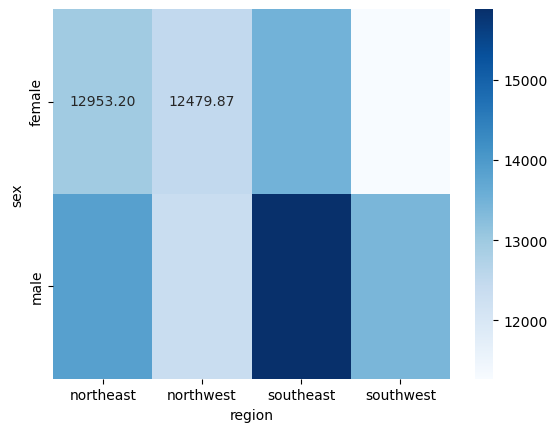

In [55]:
# 열지도 시각화
# sns.heatmap(agg2_wide)
sns.heatmap(agg2_wide, cmap='Blues', annot=True, fmt='.2f')

* 참고: [Color Palette](https://seaborn.pydata.org/tutorial/color_palettes.html)

<br>

#### [실습] df_sp 활용

1. 'race/ethnicity', 'parental level of education'별(index, columns) 'math score'(values)의 평균(aggfunc)을 피벗테이블로 계산
2. 1.의 결과를 열지도로 시각화

In [46]:
import seaborn as sns

<Axes: xlabel='parental level of education', ylabel='race/ethnicity'>

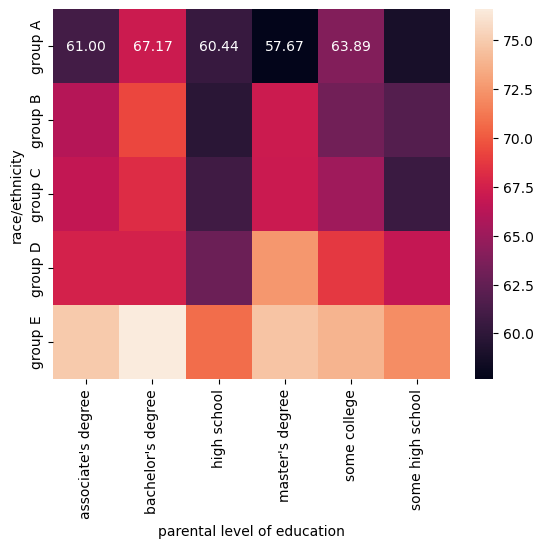

In [58]:
df_pvt = df_sp.pivot_table(
    index='race/ethnicity',
    columns='parental level of education',
    values='math score',
    aggfunc='mean'
)
sns.heatmap(df_pvt, annot=True, fmt='.2f')
# annot : 각 수치에 따른 위치에 값 표시

<Axes: xlabel='race/ethnicity', ylabel='parental level of education'>

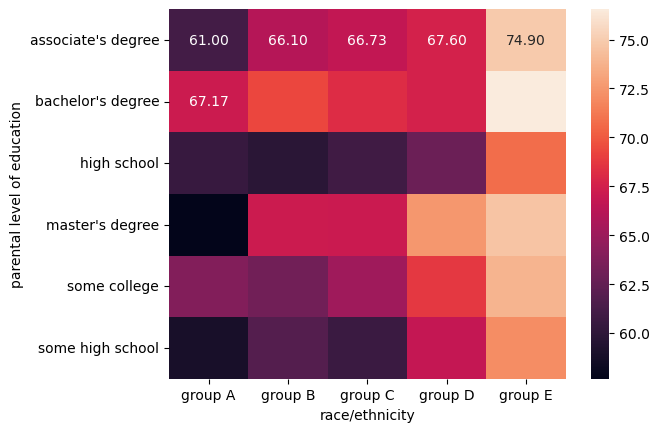

In [47]:
df_sp

# 1. 'race/ethnicity', 'parental level of education'별 'math score'의 평균을 피벗테이블로 계산
df_agg = df_sp.pivot_table(
    columns='race/ethnicity',
    index='parental level of education',
    values='math score',
    aggfunc='mean'
)

# 2. 1.의 결과를 열지도로 시각화
sns.heatmap(df_agg, annot=True, fmt='.2f')

<br>

## 7. 결과 데이터와 그래프의 저장

함수를 활용해서 분석 결과 데이터와 그래프를 저장 가능

In [59]:
df_ins

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [62]:
# 폴더 생성
%mkdir result

* `!` : 
* `%` : r

In [60]:
# 대상 결과 데이터 확인
df_pt1 = df_ins.pivot_table(index='region', columns='smoker', values='charges', aggfunc='mean')
df_pt1

smoker,no,yes
region,,
northeast,9165.531672,29673.536473
northwest,8556.463715,30192.003182
southeast,8032.216309,34844.996824
southwest,8019.284513,32269.063494


In [63]:
# to_csv()로 결과 데이터를 csv 형식으로 저장하기(한글 포함 시 인코딩방식 지정)
df_pt1.to_csv('./result/result.csv', index=True, encoding='CP949')

<Axes: xlabel='smoker', ylabel='region'>

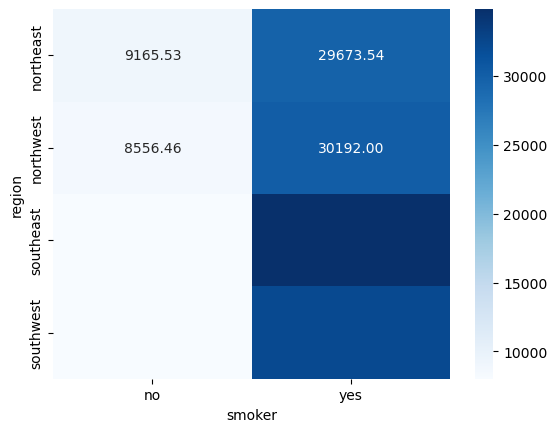

In [64]:
# 대상 그래프 확인
plot1 = sns.heatmap(df_pt1, cmap='Blues', annot=True, fmt='.2f')
plot1

In [65]:
# savefig()을 활용한 그래프 저장
plot1.figure.savefig('./result/plot1.jpg')

#### End of script